In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
df['Day'] = pd.to_datetime(df['Day'])
df['year'] = [d.date().year for d in df['Day']]
print(min(df.groupby('year')['t'].mean()), max(df.groupby('year')['t'].mean()))

6.98082191781 9.07945205479


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [5]:
df['Day'] = pd.to_datetime(df['Day'])
df['month'] = [d.date().month for d in df['Day']]

In [6]:
jan = df.loc[df['month'] == 1]
m = 0
for year in set(jan['year']):
    l = len(jan[(jan['t'] >= 0) & (jan['year'] == year)])
    if l > m:
        m = l
        y = year
print(y)

2008


**3.** В каком году было самое холодное лето (по средней температуре)

In [7]:
df['Day'] = pd.to_datetime(df['Day'])
coldest = [df[(df['Day'].dt.month > 5) & (df['Day'].dt.month < 9) & (df['Day'].dt.year==i)]['t'].mean() for i in set(jan['year'])]
min_avg = min(coldest)
coldest.index(min_avg) + 2008

2009

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [8]:
abs(df['t']-df['t'].shift(1)).max()

15.0

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

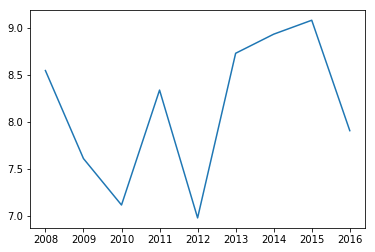

In [9]:
%matplotlib inline
df['Day'] = pd.to_datetime(df['Day'])
df['year'] = [d.date().year for d in df['Day']]
d = df.groupby('year')['t'].mean()
plt.plot(sorted(list(set(df['year']))), list(d))